In [32]:
import pandas as pd
import numpy as np
import math
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import time
from datetime import date
from tqdm.notebook import tqdm as tqdm
from matplotlib import cm
import ast
from ipynb.fs.defs.functions import getName
from ipynb.fs.defs.functions import new_route

dft = pd.read_csv("../distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
dfd = pd.read_csv("../distanze/distances_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

num_orders = pd.read_csv("../distanze/num_orders.csv", delimiter=";", encoding = "ISO-8859-1")
orders_matrix = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
orders = pd.read_csv("../distanze/request_cr.csv", delimiter=",", encoding = "ISO-8859-1")

In [33]:
k = pd.read_csv("FrequencesResults/frequences.csv", encoding = "ISO-8859-1", index_col=0, header=0, squeeze = True)
week = ["lunedi", "martedi", "mercoledi", "giovedi", "venerdi", "sabato", "domenica"]
for d in week:
    k[d] = ast.literal_eval(k[d])

In [34]:
k

lunedi       [[Offanengo, Clavelli Martini, 5, Soncino, Dan...
martedi      [[Offanengo, Clavelli Martini, 5, Ripalta Crem...
mercoledi    [[Vescovato, Roma, 44, Soncino, Dante Alighier...
giovedi      [[Manerbio, INSURREZIONE NAZIONALE, Crema, Civ...
venerdi      [[Rivolta d'Adda, Stefano Renzi, 5, Bonemerse,...
sabato       [[Manerbio, INSURREZIONE NAZIONALE, Bonemerse,...
domenica     [[Offanengo, Clavelli Martini, 5, Vescovato, R...
Name: 0, dtype: object

In [35]:
def manage_exception(string):
    if(string.lower().strip() == 'piadena drizzona'):
        return 'Piadena, Platina, 40'
    elif(string.lower().strip() == 'brescia'):
        return 'manerbio, insurrezione nazionale'
    elif(string.lower().strip() == 'centro fumetto a. pazienza' or string.lower().strip() == 'cremona. la piccola biblioteca' or string.lower().strip() == 'uff. bib. cremona'):
        return 'cremona, ugolani dati, 4'
    elif(string.lower().strip() == 'casale cremasco vidolasco'):
        return 'Casale Cremasco-Vidolasco, Roma, 56'
    elif(string.lower().strip() == 'cremona-m.i.t.o.'):
        return 'Cremona, Palosca n. 2'
    elif(string.lower().strip() == 'cremona - manin (scolastica)'):
        return 'Cremona, Felice Cavallotti, 2'
    elif(string.lower().strip() == 'gadesco pieve delmona'):
        return 'Gadesco-Pieve Delmona, Giovanni Lonati 9'
    elif(string.lower().strip() == 'cremona - cda'):
        return 'cremona, sesto 39'
    elif(string.lower().strip() == 'crema'):
        return 'Crema, Civerchi, 9'
    elif(string.lower().strip() == 'martignana di po, libertà, 64'):
        return 'martignana di po, libertà, 64'
    else:
        return string

In [ ]:
ords = orders[["data_richiesta", "biblioteca_partenza", "biblioteca_destinazione"]]
for i in tqdm(range(len(ords))):
    ords["data_richiesta"].iloc[i] = ords["data_richiesta"].iloc[i].split(" ")[0]
ords

In [28]:
ords.to_csv("distribution/ords_by_date.csv", sep=";", encoding = "ISO-8859-1")

In [45]:
ords_aggregated = pd.read_csv("distribution/ords_by_date.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

In [50]:
ords_aggregated = ords.groupby(by=["biblioteca_partenza", "data_richiesta"]).count()

In [51]:
ords_aggregated

biblioteca_destinazione
biblioteca_partenza data_richiesta                              
ANNICCO             2016-01-07                                 1
                    2016-01-11                                 3
                    2016-01-15 11:09:50                        1
                    2016-01-16 10:54:58                        1
                    2016-01-18 15:43:00                        1
...                                                          ...
VESCOVATO           2018-12-28 13:54:49                        1
                    2018-12-28 13:55:02                        1
                    2018-12-28 15:13:08                        1
                    2018-12-29 14:58:10                        1
                    2018-12-29 23:11:26                        1

[158082 rows x 1 columns]

In [52]:
to_be_removed_very_male = []
for i in tqdm(range(len(ords_aggregated))):
    try:
        getName(dft, manage_exception(ords_aggregated.iloc[i].name[0]))
    except:
        #ords_aggregated = ords_aggregated.drop(ords_aggregated.index[i])
        to_be_removed_very_male.append(ords_aggregated.index[i])
len(to_be_removed_very_male)

C:\Users\Alberto\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1190

In [ ]:
for el in to_be_removed_very_male:
    ords_aggregated = ords_aggregated.drop(el)
ords_aggregated

In [49]:
len(to_be_removed_very_male)

1309

In [55]:
ords_aggregated = ords_aggregated.drop(to_be_removed_very_male)
ords_aggregated

biblioteca_destinazione
biblioteca_partenza data_richiesta                              
ANNICCO             2016-01-07                                 1
                    2016-01-11                                 3
                    2016-01-15 11:09:50                        1
                    2016-01-16 10:54:58                        1
                    2016-01-18 15:43:00                        1
...                                                          ...
VESCOVATO           2018-12-28 13:54:49                        1
                    2018-12-28 13:55:02                        1
                    2018-12-28 15:13:08                        1
                    2018-12-29 14:58:10                        1
                    2018-12-29 23:11:26                        1

[156892 rows x 1 columns]

In [53]:
ords_aggregated.to_csv("distribution/ords_by_date_filtered.csv", sep=";", encoding = "ISO-8859-1")

In [56]:
ords_aggregated

biblioteca_destinazione
biblioteca_partenza data_richiesta                              
ANNICCO             2016-01-07                                 1
                    2016-01-11                                 3
                    2016-01-15 11:09:50                        1
                    2016-01-16 10:54:58                        1
                    2016-01-18 15:43:00                        1
...                                                          ...
VESCOVATO           2018-12-28 13:54:49                        1
                    2018-12-28 13:55:02                        1
                    2018-12-28 15:13:08                        1
                    2018-12-29 14:58:10                        1
                    2018-12-29 23:11:26                        1

[156892 rows x 1 columns]

In [15]:
freq = pd.DataFrame(index=dft.columns, columns=["partenza", "destinazione"])
freq = freq.replace(np.nan, 0)
for i in tqdm(range(len(orders))):
    row = orders.iloc[i]
    try:
        if(getName(dft, manage_exception(row["biblioteca_destinazione"])) != getName(dft, manage_exception(row["biblioteca_partenza"]))):
            freq["destinazione"][getName(dft, manage_exception(row["biblioteca_destinazione"]))] += 1
            freq["partenza"][getName(dft, manage_exception(row["biblioteca_partenza"]))] += 1
    except:
        None


KeyboardInterrupt



In [61]:
freq.to_csv("distribution/biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

['Offanengo, Clavelli Martini, 5', 'Soncino, Dante Alighieri, 23', 'lunedi']

In [64]:
week = k.index
for i in tqdm(range(len(week))):
    day = week[i]
    lista = k[day]
    tmp = pd.DataFrame(index=dft.columns, columns=dft.columns).replace(np.nan, 0)
    for el in lista:
        partenza = el[0]
        destinazione = el[1]
        tmp.loc[partenza].loc[destinazione] += 1
    tmp.to_csv("distribution/"+day+"_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

In [74]:
daily_d = pd.DataFrame(index=k.index, columns=["tot"]).replace(np.nan, 0)
for d in k.index:
    daily_d["tot"].loc[d] = len(k[d])

In [79]:
daily_d.to_csv("distribution/week_biblio_freq.csv", sep=";", encoding = "ISO-8859-1")

## Charts

In [17]:
#Single biblio freq
s_b_f = pd.read_csv("distribution/ords_by_date_filtered.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
s_b_f

,data_richiesta,biblioteca_partenza
biblioteca_destinazione,,
ANNICCO,2016-01-04,2
ANNICCO,2016-01-25 16:53:42,1
ANNICCO,2016-01-27 17:15:31,1
ANNICCO,2016-01-27 17:17:15,1
ANNICCO,2016-01-27 17:21:16,1
...,...,...
VESCOVATO,2018-12-07 17:31:17,1
VESCOVATO,2018-12-09 10:58:26,1
VESCOVATO,2018-12-31 13:17:29,1


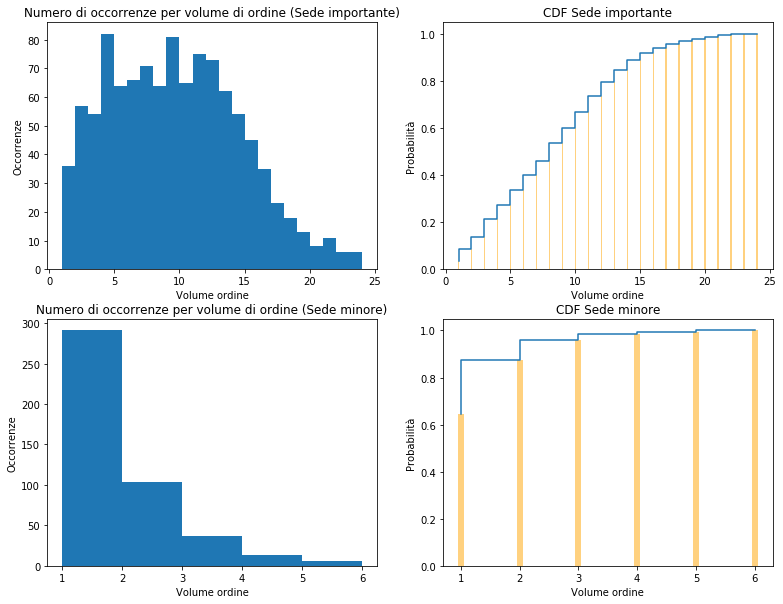

In [151]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_destinazione"].loc["CREMA"])):
    c=list(s_b_f["biblioteca_destinazione"].loc["CREMA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,10])
plt.subplot(222)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede importante")

plt.subplot(221)
plt.hist(s_b_f["biblioteca_destinazione"].loc["CREMA"].values, bins=range(1, max(s_b_f["biblioteca_destinazione"].loc["CREMA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede importante)")

x = []
y = []
for i in range(1,max(s_b_f["biblioteca_destinazione"].loc["GUSSOLA"])):
    c=list(s_b_f["biblioteca_destinazione"].loc["GUSSOLA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

plt.subplot(224)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede minore")

plt.subplot(223)
plt.hist(s_b_f["biblioteca_destinazione"].loc["GUSSOLA"].values, bins=range(1, max(s_b_f["biblioteca_destinazione"].loc["GUSSOLA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede minore)")

plt.show()

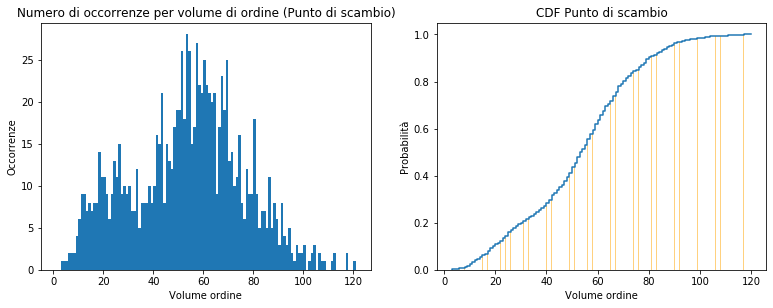

In [152]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_destinazione"].loc["BRESCIA"])):
    c=list(s_b_f["biblioteca_destinazione"].loc["BRESCIA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,10])
plt.subplot(222)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Punto di scambio")

plt.subplot(221)
plt.hist(s_b_f["biblioteca_destinazione"].loc["BRESCIA"].values, bins=range(1, max(s_b_f["biblioteca_destinazione"].loc["BRESCIA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Punto di scambio)")

plt.show()

In [154]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_destinazione"])):
    c=list(s_b_f["biblioteca_destinazione"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

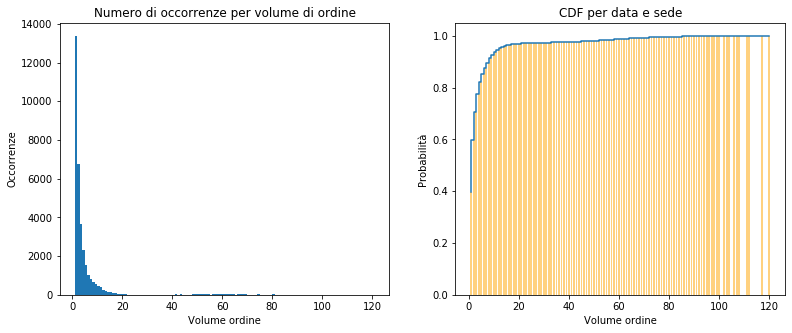

In [155]:
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,5])
plt.subplot(122)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.7, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF per data e sede")

plt.subplot(121)
plt.hist(s_b_f["biblioteca_destinazione"].values, bins=range(1, max(s_b_f["biblioteca_destinazione"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine")
plt.show()

## ordini in entrata

In [88]:
#Single biblio freq
s_b_f = pd.read_csv("distribution/ords_by_date_filtered_uscita.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
set(s_b_f.index)

{'ANNICCO',
 'Agnadello',
 'BAGNOLO CREMASCO',
 'BONEMERSE',
 'BRESCIA',
 'CAMISANO',
 'CAPERGNANICA',
 'CAPRALBA',
 'CASALBUTTANO',
 'CASALE CREMASCO VIDOLASCO',
 'CASALETTO VAPRIO',
 'CASALMAGGIORE',
 'CASTELLEONE',
 'CASTELVERDE',
 'CENTRO FUMETTO A. PAZIENZA',
 "CINGIA DE' BOTTI",
 'CREMA',
 'CREMONA - CDA',
 'CREMONA. LA PICCOLA BIBLIOTECA',
 'Cremona - Manin (scolastica)',
 'Cremona-M.I.T.O.',
 'DOVERA',
 'FIESCO',
 'GADESCO PIEVE DELMONA',
 'GRONTARDO',
 'GRUMELLO CREMONESE',
 'GUSSOLA',
 'ISOLA DOVARESE',
 'IZANO',
 'MADIGNANO',
 'MARTIGNANA DI PO',
 'MONTE CREMASCO',
 'MONTODINE',
 'OFFANENGO',
 'OSTIANO',
 'PADERNO PONCHIELLI',
 'PALAZZO PIGNANO',
 'PANDINO',
 'PERSICO DOSIMO',
 'PESCAROLO ED UNITI',
 'PIADENA DRIZZONA',
 'PIANENGO',
 'PIZZIGHETTONE',
 'RICENGO',
 'RIPALTA CREMASCA',
 'RIVAROLO DEL RE',
 "RIVOLTA D'ADDA",
 'ROMANENGO',
 'SAN BASSANO',
 'SAN GIOVANNI IN CROCE',
 'SERGNANO',
 'SESTO ED UNITI',
 'SOLAROLO RAINERIO',
 'SONCINO',
 'SORESINA',
 'SOSPIRO',
 "SPINO D

In [79]:
len(np.sort(s_b_f.loc["BRESCIA"]["biblioteca_partenza"]))

15955

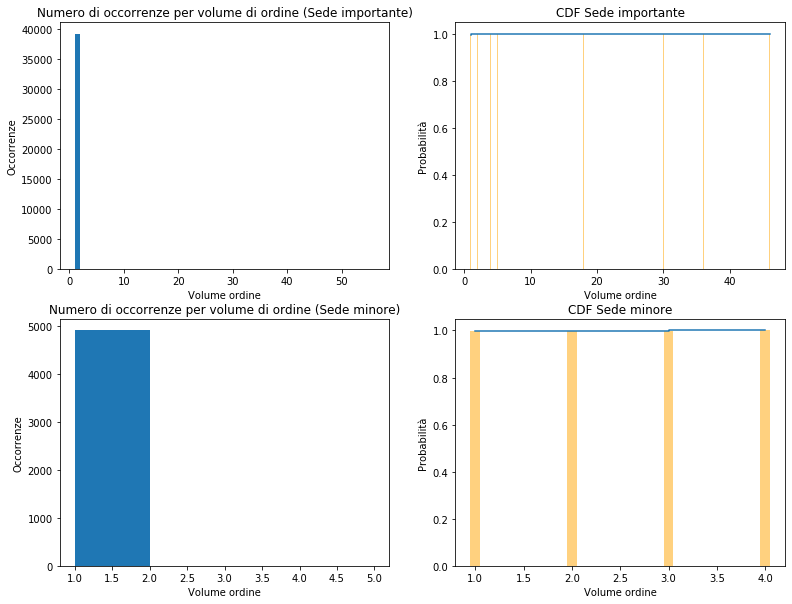

In [87]:
x = []
y = []
maggiore = "CREMA"
for i in range(1,max(s_b_f["biblioteca_partenza"].loc[maggiore])):
    c=list(s_b_f["biblioteca_partenza"].loc[maggiore].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,10])
plt.subplot(222)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede importante")

plt.subplot(221)
plt.hist(s_b_f["biblioteca_partenza"].loc[maggiore].values, bins=range(1, max(s_b_f["biblioteca_partenza"].loc[maggiore]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede importante)")

x = []
y = []
minore = "PANDINO"
for i in range(1,max(s_b_f["biblioteca_partenza"].loc[minore])):
    c=list(s_b_f["biblioteca_partenza"].loc[minore].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

plt.subplot(224)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede minore")

plt.subplot(223)
plt.hist(s_b_f["biblioteca_partenza"].loc[minore].values, bins=range(1, max(s_b_f["biblioteca_partenza"].loc[minore]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede minore)")

plt.show()

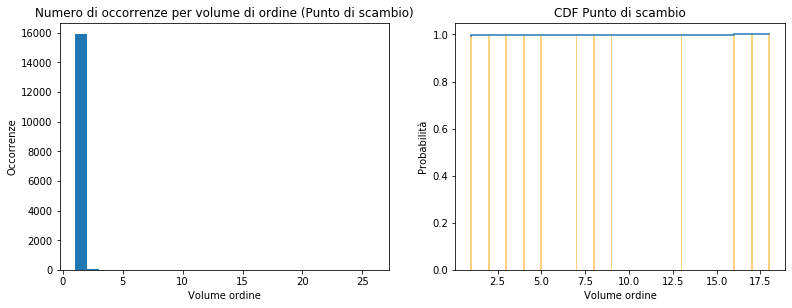

In [89]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_partenza"].loc["BRESCIA"])):
    c=list(s_b_f["biblioteca_partenza"].loc["BRESCIA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,10])
plt.subplot(222)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Punto di scambio")

plt.subplot(221)
plt.hist(s_b_f["biblioteca_partenza"].loc["BRESCIA"].values, bins=range(1, max(s_b_f["biblioteca_partenza"].loc["BRESCIA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Punto di scambio)")

plt.show()

In [92]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_partenza"])):
    c=list(s_b_f["biblioteca_partenza"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

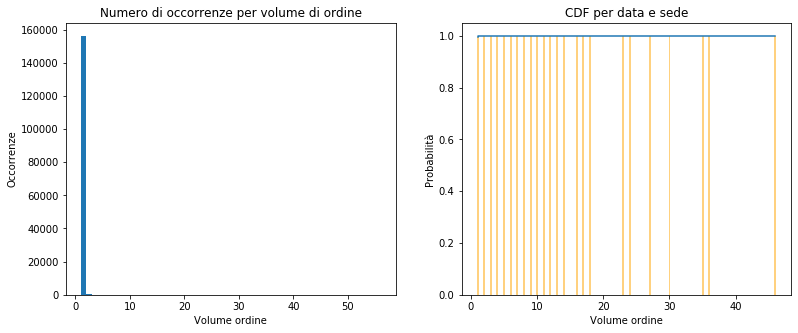

In [93]:
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,5])
plt.subplot(122)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.3, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF per data e sede")

plt.subplot(121)
plt.hist(s_b_f["biblioteca_partenza"].values, bins=range(1, max(s_b_f["biblioteca_partenza"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine")
plt.show()

In [21]:
x = []
y = []
for i in range(1,max(s_b_f["biblioteca_partenza"].loc["CREMA"])):
    c=list(s_b_f["biblioteca_partenza"].loc["CREMA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)
#Distribuzioni con numero di ordini divisi per bibliteca
plt.figure(figsize=[13,10])
plt.subplot(222)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede importante")

plt.subplot(221)
plt.hist(s_b_f["biblioteca_partenza"].loc["CREMA"].values, bins=range(1, max(s_b_f["biblioteca_partenza"].loc["CREMA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede importante)")

x = []
y = []
for i in range(1,max(s_b_f["biblioteca_partenza"].loc["GUSSOLA"])):
    c=list(s_b_f["biblioteca_destinazione"].loc["GUSSOLA"].values).count(i)
    if c>0:
        y.append(c)
        x.append(i)

plt.subplot(224)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=0.1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF Sede minore")

plt.subplot(223)
plt.hist(s_b_f["biblioteca_partenza"].loc["GUSSOLA"].values, bins=range(1, max(s_b_f["biblioteca_partenza"].loc["GUSSOLA"]), 1))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di occorrenze per volume di ordine (Sede minore)")

plt.show()

KeyError: 'biblioteca_partenza'

## Per giorno 

In [168]:
tot = []
for d in k.index:
    tmp = pd.read_csv("distribution/"+d+"_biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
    for lt in tmp.values.tolist():
        tot += lt

In [169]:
np.sort([n for n in tot if n>1500])

array([1798, 2346, 3134, 3600, 3845, 4237])

In [170]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,1500):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)

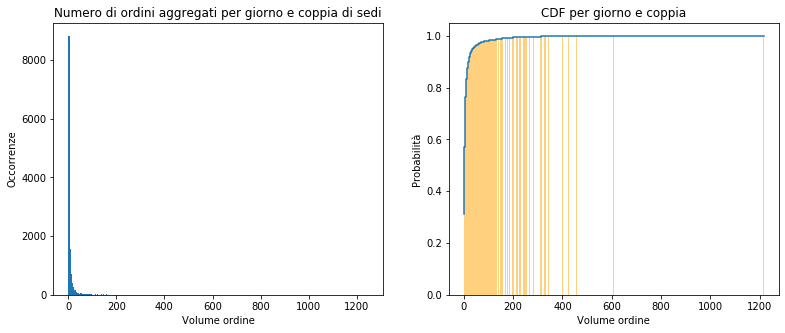

In [171]:
plt.figure(figsize=[13,5])
plt.subplot(122)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF per giorno e coppia")

plt.subplot(121)
plt.hist(tot_rz, bins=range(1, 1250, 5))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di ordini aggregati per giorno e coppia di sedi")

plt.show()

[1798, 607]
[463, 4237, 418, 771, 471, 474]
[442, 3845, 658]
[457, 3600, 581, 463]
[3134, 742]
[2346, 424]
[1216]


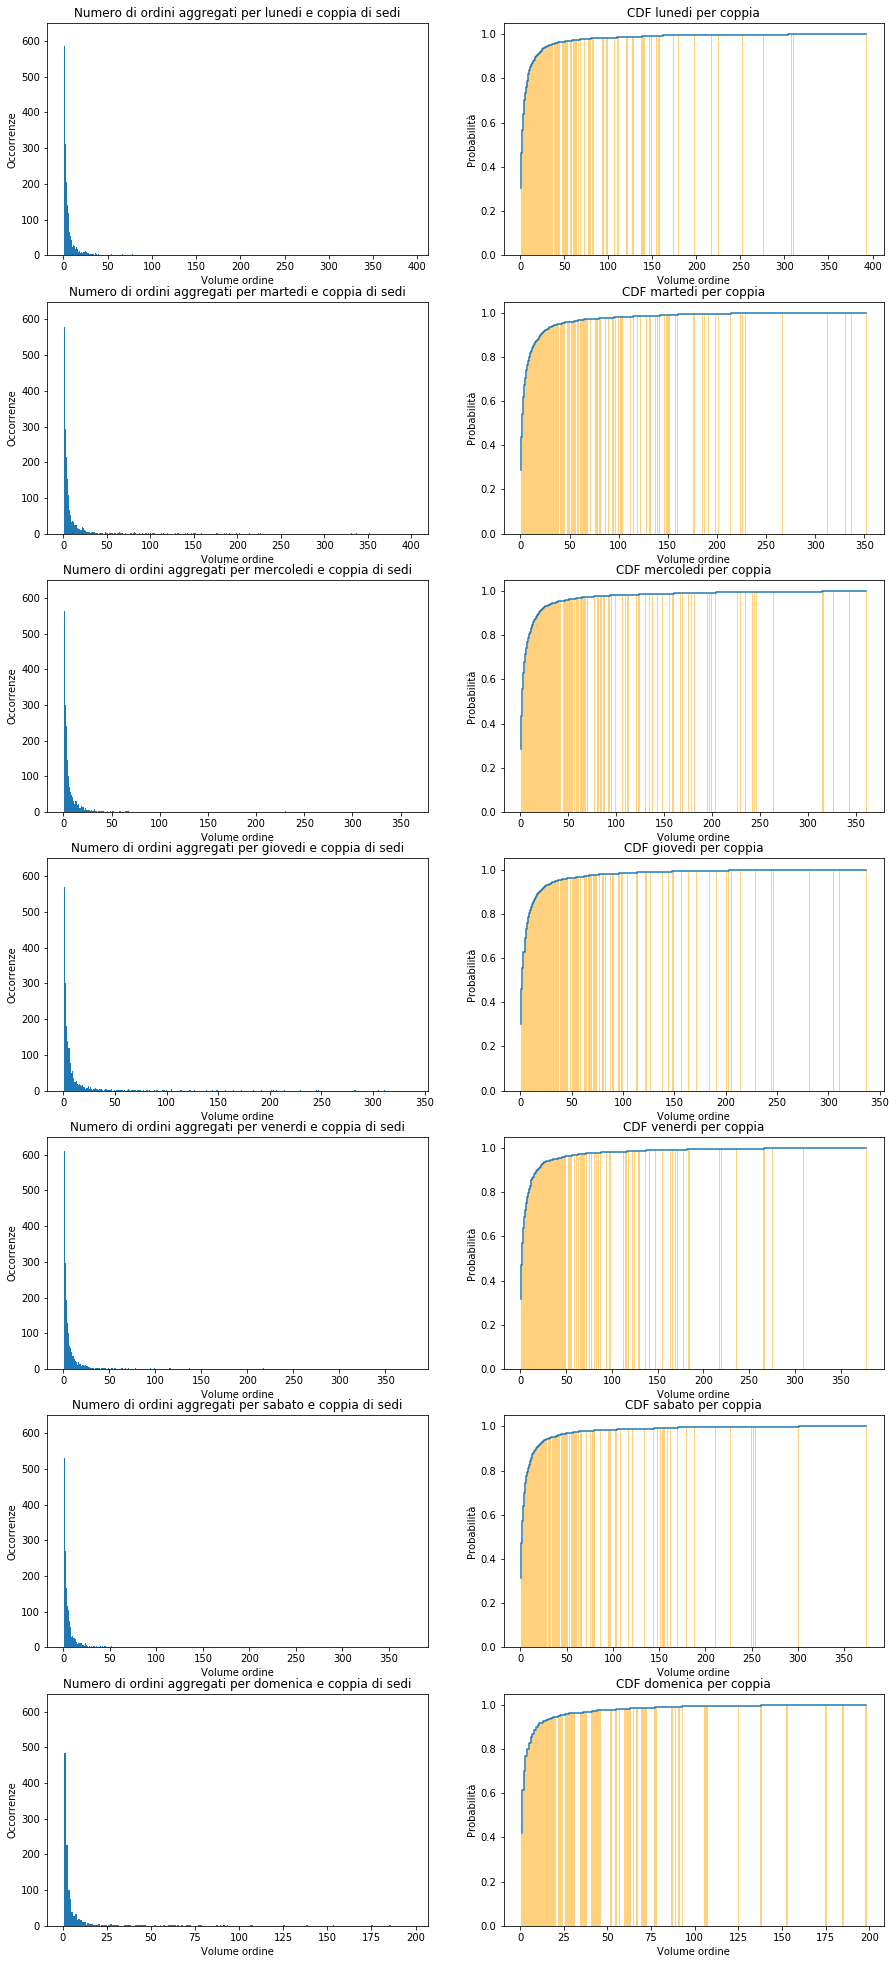

In [166]:
pos = 1
plt.figure(figsize=[15,35])
for d in k.index:
    tmp = pd.read_csv("distribution/"+d+"_biblio_freq.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
    tot = []
    
    for lt in tmp.values.tolist():
        tot += lt
        
    tot_rz = [n for n in tot if n!=0]
    print([n for n in tot if n>400])
    
    x = []
    y = []
    for i in range(1,400):
        c = list(tot_rz).count(i)
        if c>0:
            y.append(c)
            x.append(i)
    
    plt.subplot(7,2,pos+1)
    plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
    plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
    plt.xlabel("Volume ordine")
    plt.ylabel("Probabilità")
    plt.title("CDF "+d+" per coppia")
    
    pos+=1
    
    plt.subplot(7,2,pos-1)
    plt.hist(tot_rz, bins=range(1, max([n for n in tot if n<=400]), 1))
    plt.ylim([0,650])
    plt.xlabel("Volume ordine")
    plt.ylabel("Occorrenze")
    plt.title("Numero di ordini aggregati per "+d+" e coppia di sedi")
    pos += 1
plt.show()

In [172]:
tot = []
tmp = pd.read_csv("distribution/ord_numbers.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
for lt in tmp.values.tolist():
    tot += lt

In [173]:
tot_rz = [n for n in tot if n!=0]
x = []
y = []
for i in range(1,1500):
    c = list(tot_rz).count(i)
    if c>0:
        y.append(c)
        x.append(i)   

In [174]:
[n for n in tot_rz if n>1500]

[1582, 2540, 20176, 1566, 3958, 1723, 2533, 1936, 1965, 1641]

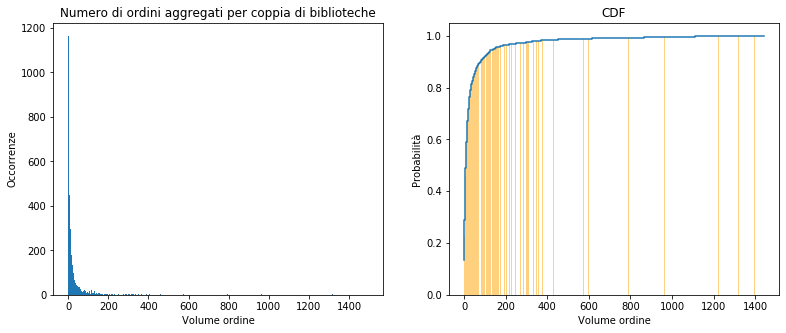

In [175]:
plt.figure(figsize=[13,5])
plt.subplot(122)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=1, color="orange", alpha=0.5)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.title("CDF")

plt.subplot(121)
plt.hist(tot_rz, bins=range(1, 1500, 5))
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di ordini aggregati per coppia di biblioteche")

plt.show()

[8373, 18507, 20915, 23755, 24039, 26249, 29164]


<Figure size 936x360 with 0 Axes>

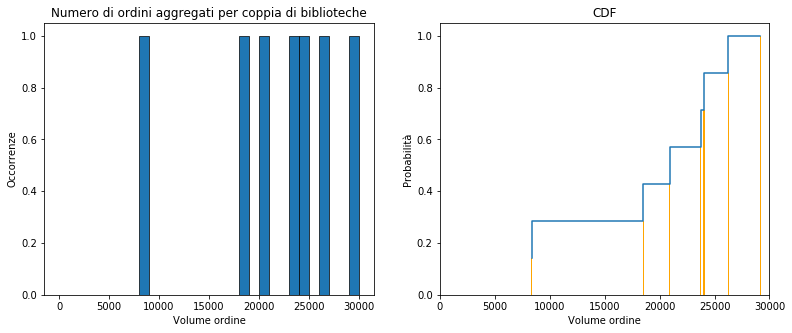

In [142]:
plt.figure(figsize=[13,5])
h = [len(x) for x in k]
x = []
y = []
for i in range(max(h)+1):
    c = list(h).count(i)
    if c>0:
        y.append(c)
        x.append(i)  

print(x)
plt.figure(figsize=[13,5])
plt.subplot(122)
plt.bar(x, np.cumsum(y)/max(np.cumsum(y)), width=100, color="orange", alpha=1)
plt.step(x, np.cumsum(y)/max(np.cumsum(y)))
plt.xlabel("Volume ordine")
plt.ylabel("Probabilità")
plt.xlim([0,30000])
plt.title("CDF")

plt.subplot(121)
plt.hist(h, bins=range(0, max(h)+1001, 1000), edgecolor='black', linewidth=0.7)
plt.xlabel("Volume ordine")
plt.ylabel("Occorrenze")
plt.title("Numero di ordini aggregati per coppia di biblioteche")

plt.show()



In [136]:
np.cumsum(y)

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)